# TypeScript Codebase Analysis

This notebook demonstrates how to use the `ts-analyzer` module to analyze TypeScript codebases.

In [1]:
# Import the ts-analyzer module
from ts_analyzer import TypeScriptAnalyzer
import os
import json
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Configure matplotlib for better visualization
plt.style.use('ggplot')
%matplotlib inline

## Initialize the Analyzer

First, we need to initialize the analyzer with the path to our TypeScript codebase. Make sure to update the path to point to your TypeScript project.

In [2]:
# Path to your TypeScript codebase
# Change this to the path of your TypeScript project
CODEBASE_PATH = "/Users/ralph/projects/spellcast"

# Initialize the analyzer
analyzer = TypeScriptAnalyzer(CODEBASE_PATH)

# Find all TypeScript files in the codebase
ts_files = analyzer.find_ts_files()
print(f"Found {len(ts_files)} TypeScript files")

# Display the first 5 files
for file in ts_files[:5]:
    print(f" - {file}")

Found 20 TypeScript files
 - /Users/ralph/projects/spellcast/packages/ui/src/api.ts
 - /Users/ralph/projects/spellcast/packages/ui/src/util.ts
 - /Users/ralph/projects/spellcast/packages/ui/src/hooks/useClient.ts
 - /Users/ralph/projects/spellcast/packages/ui/src/hooks/useSession.ts
 - /Users/ralph/projects/spellcast/packages/ui/src/hooks/useWindowSize.ts


## Analyze Imports

Let's analyze imports in the codebase to understand dependencies between files and modules.

In [3]:
# Find imports of a specific module or class
# Replace 'react' with any module/class you want to find imports for
imports = analyzer.find_imports('react')

print(f"Found {len(imports)} files that import 'react'")

# Display a sample of the imports
for file_path, file_imports in list(imports.items())[:3]:
    print(f"\nFile: {file_path}")
    for imp in file_imports:
        print(f"  Line {imp['line']}: {imp['text']}")

Found 6 files that import 'react'

File: /Users/ralph/projects/spellcast/packages/ui/src/util.ts
  Line 2: import React from "react";

File: /Users/ralph/projects/spellcast/packages/ui/src/hooks/useClient.ts
  Line 2: import { useEffect, useState, useCallback } from "react";

File: /Users/ralph/projects/spellcast/packages/ui/src/hooks/useSession.ts
  Line 1: import { useCallback, useEffect, useState } from "react";


## Find Function Calls

We can identify where specific functions are being called in the codebase.

In [4]:
# Find calls to a specific function
# Replace 'useState' with any function you want to find calls for
function_calls = analyzer.find_function_calls('useEffect', extract_args=True)

print(f"Found {len(function_calls)} files with calls to 'useState'")

# Display a sample of the function calls
for file_path, calls in list(function_calls.items())[:3]:
    print(f"\nFile: {file_path}")
    for call in calls[:2]:  # Show only the first 2 calls per file
        print(f"  Line {call['line']}: {call['text']}")
        if 'args' in call:
            print(f"    args: {call['args']}")
            for arg in call['args']:
                print(f"----      arg: {arg}")

Found 4 files with calls to 'useState'

File: /Users/ralph/projects/spellcast/packages/ui/src/hooks/useClient.ts
  Line 23: useEffect(() => {
        if (!session) return;

        const websocket = new WebSocket(url);

        websocket.onopen = () => {
            setWebsocket(websocket);
            websocket.send(codecs.MessageJsonCodec.encode({type: 'syncRequest'}));
        };

        // TODO handle onerror
        // TODO heartbeat with ping/pong messages

        return () => {
            websocket.close()
        };
    }, [url, session])
    args: ["() => {\n        if (!session) return;\n\n        const websocket = new WebSocket(url);\n\n        websocket.onopen = () => {\n            setWebsocket(websocket);\n            websocket.send(codecs.MessageJsonCodec.encode({type: 'syncRequest'}));\n        };\n\n        // TODO handle onerror\n        // TODO heartbeat with ping/pong messages\n\n        return () => {\n            websocket.close()\n        };\n    }", '[url, se

## Class Definitions Analysis

Let's analyze class definitions in the codebase.

In [5]:
# Find all class definitions
classes = analyzer.find_class_definitions()

# Count classes per file
class_counts = {file_path: len(class_list) for file_path, class_list in classes.items()}

# Display total class count
total_classes = sum(class_counts.values())
print(f"Found {total_classes} classes across {len(classes)} files")

# Show files with the most classes
top_files = sorted(class_counts.items(), key=lambda x: x[1], reverse=True)[:5]
print("\nFiles with the most classes:")
for file_path, count in top_files:
    print(f"  {file_path}: {count} classes")

Found 7 classes across 4 files

Files with the most classes:
  /Users/ralph/projects/spellcast/packages/server/src/manager.ts: 2 classes
  /Users/ralph/projects/spellcast/packages/common/dist/sync.d.ts: 2 classes
  /Users/ralph/projects/spellcast/packages/common/src/sync.ts: 2 classes
  /Users/ralph/projects/spellcast/packages/server/dist/manager.d.ts: 1 classes


## Generate Codebase Statistics

Let's generate comprehensive statistics about the codebase.

Total TypeScript files: 20
Total lines of code: 1287
Average lines per file: 64.35


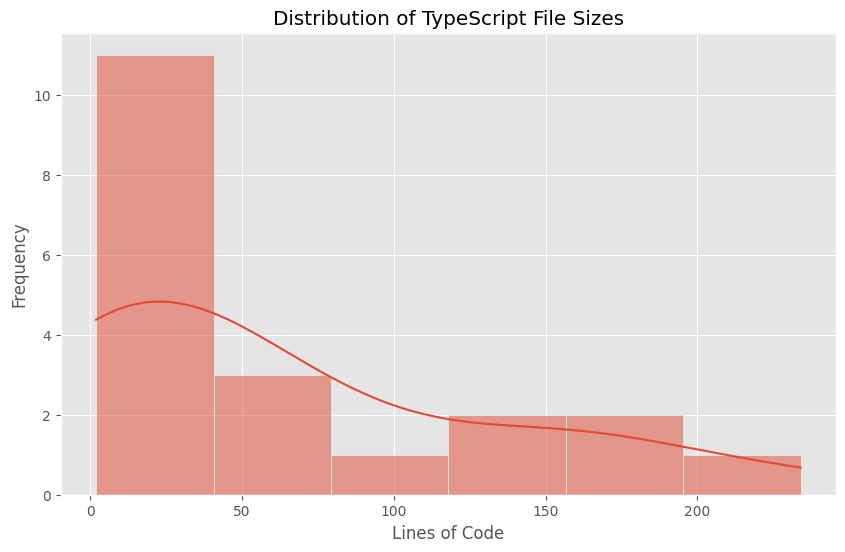

In [6]:
# Generate statistics for the codebase
stats = analyzer.generate_stats()

# Display overview statistics
print(f"Total TypeScript files: {stats['total_files']}")
print(f"Total lines of code: {stats['total_lines']}")
print(f"Average lines per file: {stats['avg_lines_per_file']:.2f}")

# Create a DataFrame for the file sizes
file_sizes = pd.DataFrame({
    'file': [str(Path(file).name) for file in stats['file_sizes'].keys()],
    'size': list(stats['file_sizes'].values())
})

# Plot the distribution of file sizes
plt.figure(figsize=(10, 6))
sns.histplot(file_sizes['size'], kde=True)
plt.title('Distribution of TypeScript File Sizes')
plt.xlabel('Lines of Code')
plt.ylabel('Frequency')
plt.show()

## Custom Queries

We can use custom TreeSitter queries to find specific patterns in the code.

In [7]:
# Example: Find all arrow functions
query = """
(arrow_function) @function
"""

arrow_functions = analyzer.custom_query(query)

print(f"Found arrow functions in {len(arrow_functions)} files")

# Count arrow functions per file
arrow_counts = {file_path: len(matches) for file_path, matches in arrow_functions.items()}
total_arrows = sum(arrow_counts.values())
print(f"Total arrow functions found: {total_arrows}")

# Show a sample of arrow functions
for file_path, matches in list(arrow_functions.items())[:2]:
    print(f"\nFile: {file_path}")
    for match in matches[:3]:  # Show only the first 3 matches per file
        print(f"  Line {match['line']}: {match['text'][:50]}..." if len(match['text']) > 50 else f"  Line {match['line']}: {match['text']}")

Found arrow functions in 0 files
Total arrow functions found: 0


## Visualizing Code Patterns

Let's create some visualizations to better understand the codebase structure.

Found 0 function_declarations
Found 0 arrow_functions
Found 0 class_declarations
Found 0 interface_declarations
Found 0 type_aliases
Found 0 export_statements
Found 0 import_statements


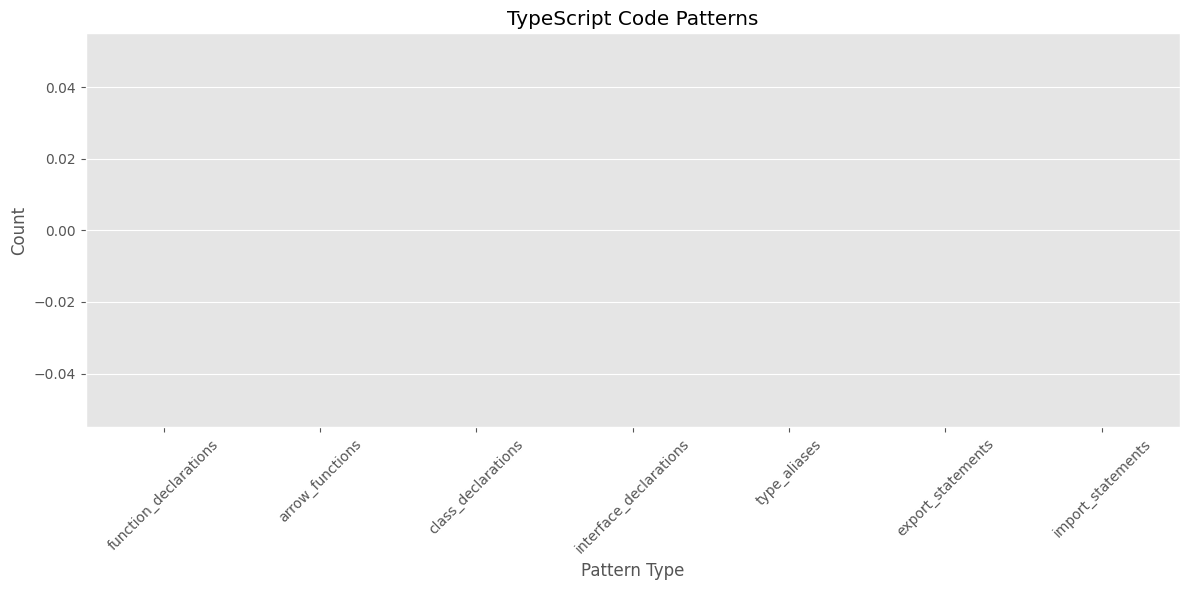

In [8]:
# Analyze different kinds of nodes in the code
node_types = {
    'function_declarations': 0,
    'arrow_functions': 0,
    'class_declarations': 0,
    'interface_declarations': 0,
    'type_aliases': 0,
    'export_statements': 0,
    'import_statements': 0
}

# Custom queries for each node type
queries = {
    'function_declarations': "(function_declaration) @func",
    'arrow_functions': "(arrow_function) @arrow",
    'class_declarations': "(class_declaration) @class",
    'interface_declarations': "(interface_declaration) @interface",
    'type_aliases': "(type_alias_declaration) @type",
    'export_statements': "(export_statement) @export",
    'import_statements': "(import_statement) @import"
}

# Run each query and count occurrences
for node_type, query in queries.items():
    results = analyzer.custom_query(query)
    count = sum(len(matches) for matches in results.values())
    node_types[node_type] = count
    print(f"Found {count} {node_type}")

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=list(node_types.keys()), y=list(node_types.values()))
plt.title('TypeScript Code Patterns')
plt.xlabel('Pattern Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()